# HOW TO HANDLE OUTLIERS

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\jyoti\\OneDrive\\Desktop\\New folder\\newplacementdata.csv")

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\1409475186.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\1409475186.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


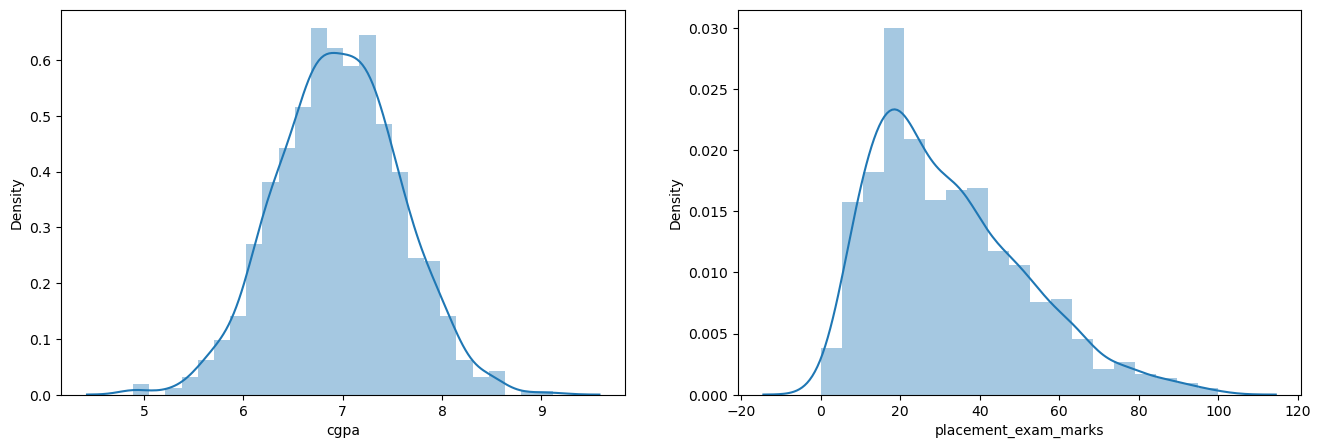

In [12]:
plt.figure(figsize =(16,5))
plt.subplot(121)
sns.distplot(df['cgpa'])
plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [13]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

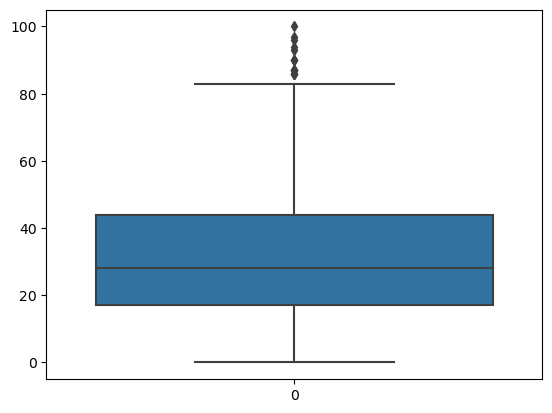

In [15]:
sns.boxplot(df['placement_exam_marks'])

In [17]:
# finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [18]:
percentile75

44.0

In [19]:
IQR =  percentile75 - percentile25

In [20]:
IQR

27.0

In [21]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

84.5

In [22]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

-23.5

# Finding Outliers

In [24]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [25]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [26]:
newdf = df[df['placement_exam_marks']< upper_limit ]

In [27]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


# comparing

C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\3660238711.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\3660238711.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['placement_exam_marks'])


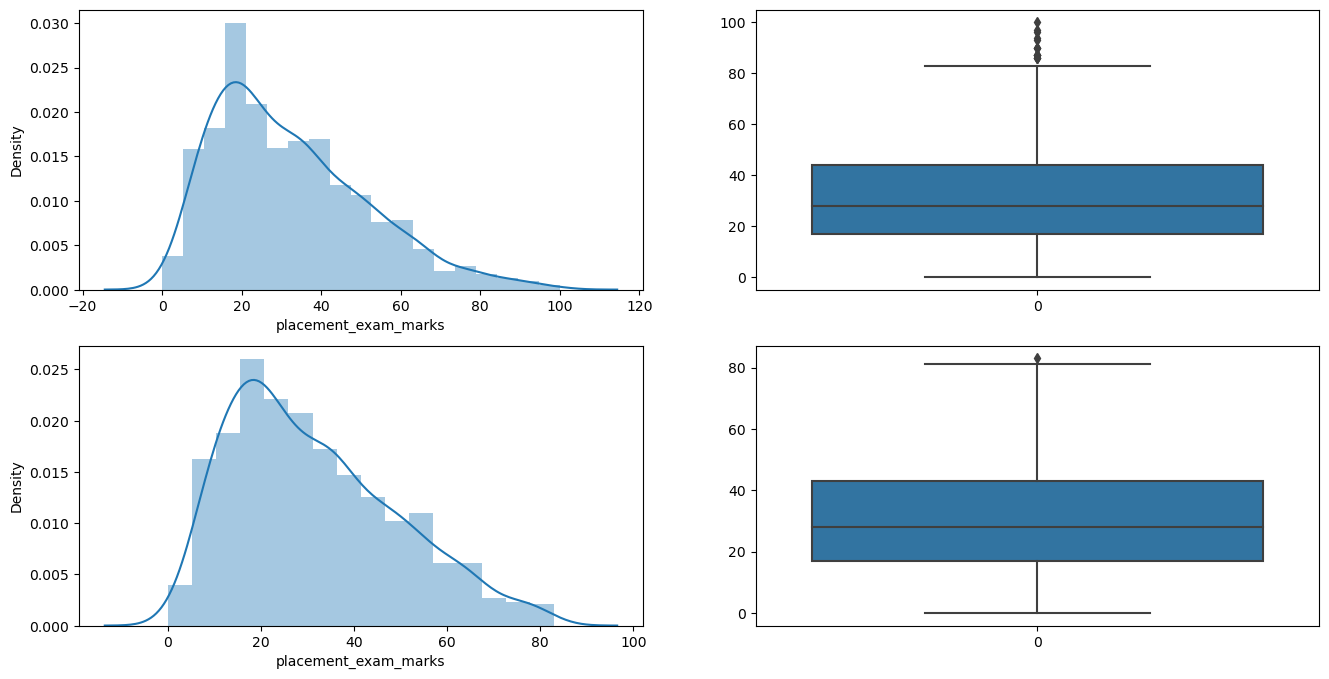

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(newdf['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(newdf['placement_exam_marks'])

plt.show()

# Capping

In [29]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']> upper_limit,
    upper_limit,
    np.where(
    new_df_cap['placement_exam_marks']< lower_limit,
    lower_limit,
    new_df_cap['placement_exam_marks']
    )
)

In [30]:
#np.where(condition , true , false)

In [31]:
new_df_cap.shape

(1000, 3)

C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\3100923076.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\3100923076.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


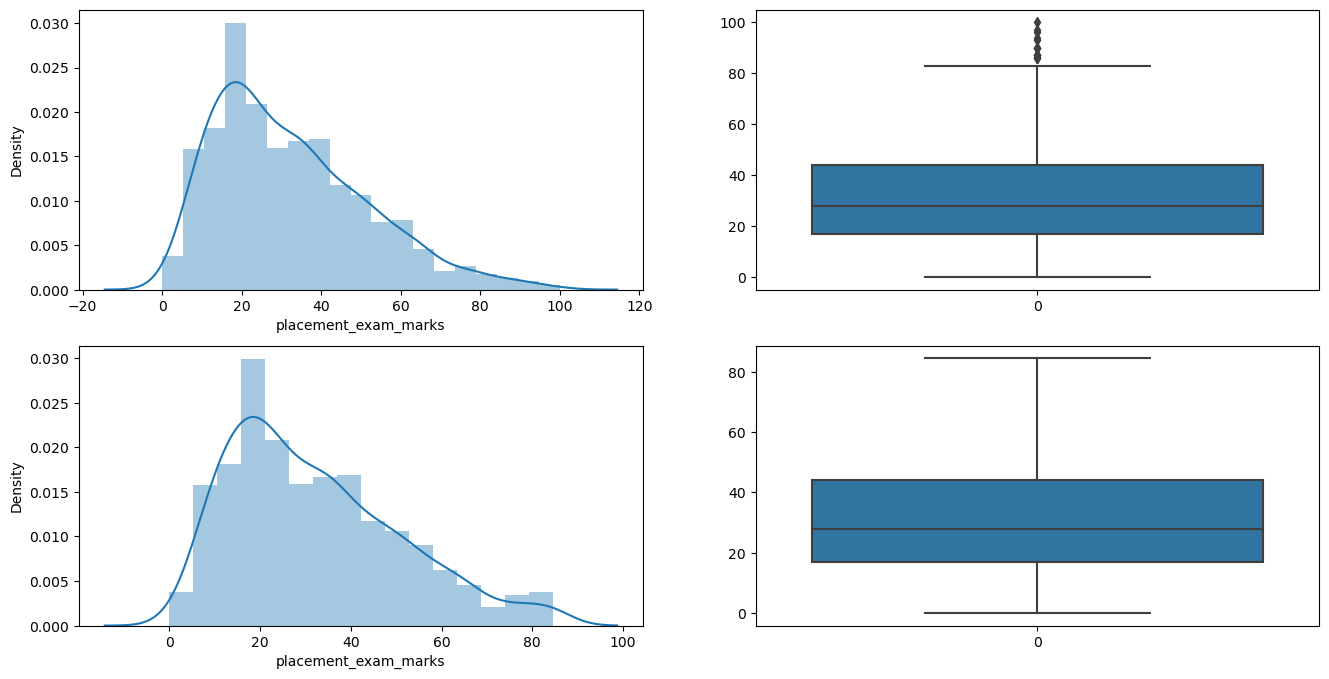

In [32]:
#comparing 

plt.figure(figsize =(16,8))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

# Implementation on titanic data

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv("C:\\Users\\jyoti\\OneDrive\\Desktop\\New folder\\titanic.csv")

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\3493565658.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PassengerId'])
C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\3493565658.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


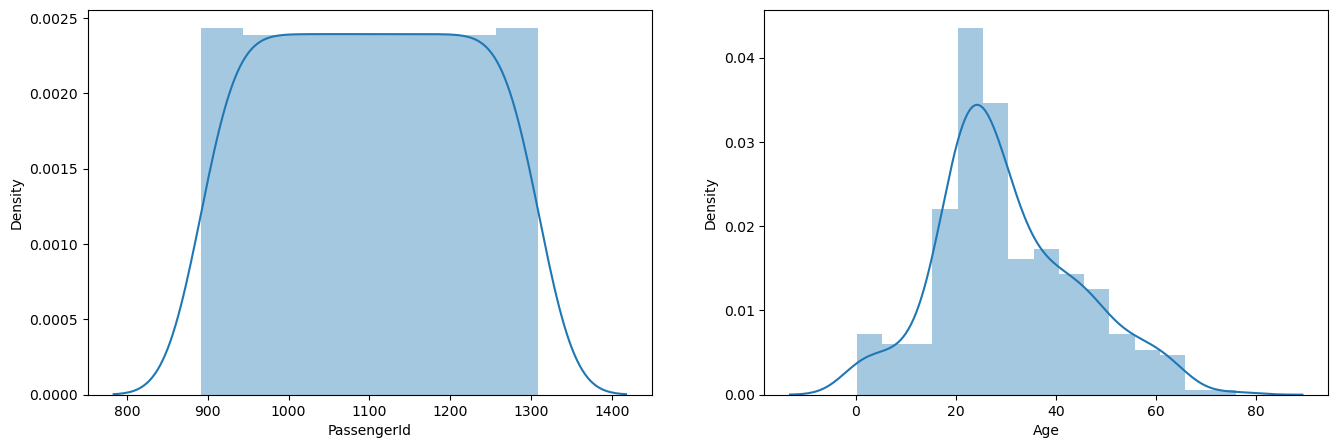

In [36]:
plt.figure(figsize = (16,5))
plt.subplot(121) 
sns.distplot(df['PassengerId'])
plt.subplot(122) 
sns.distplot(df['Age'])
plt.show()

In [37]:
df['PassengerId'].describe()

count     418.000000
mean     1100.500000
std       120.810458
min       892.000000
25%       996.250000
50%      1100.500000
75%      1204.750000
max      1309.000000
Name: PassengerId, dtype: float64

<Axes: >

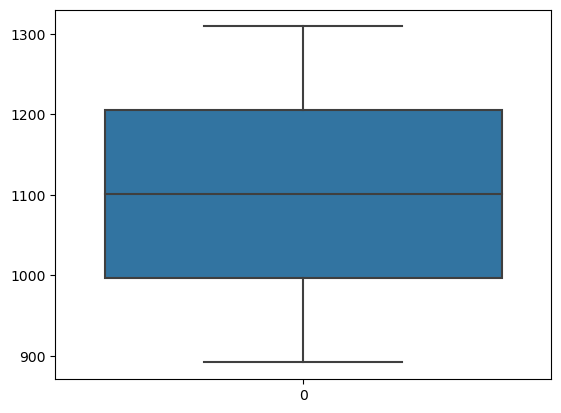

In [38]:
sns.boxplot(df['PassengerId'])

In [57]:
# Finding the IQR
percentile25 = df['Age'].quantile(0.25) 
percentile75 = df['Age'].quantile(0.75) 

In [58]:
percentile75

39.0

In [59]:
IQR = percentile75 - percentile25

In [60]:
IQR

18.0

In [61]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

66.0

In [62]:
lower_limit = percentile25 - 1.5*IQR 
lower_limit

-6.0

# Finding Outliers

In [63]:
df[df['Age']> upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [64]:
df[df['Age'] < lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Trimming

In [65]:
newdf = df[df['Age'] < upper_limit]

In [49]:
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\3757999152.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\3757999152.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['Age'])


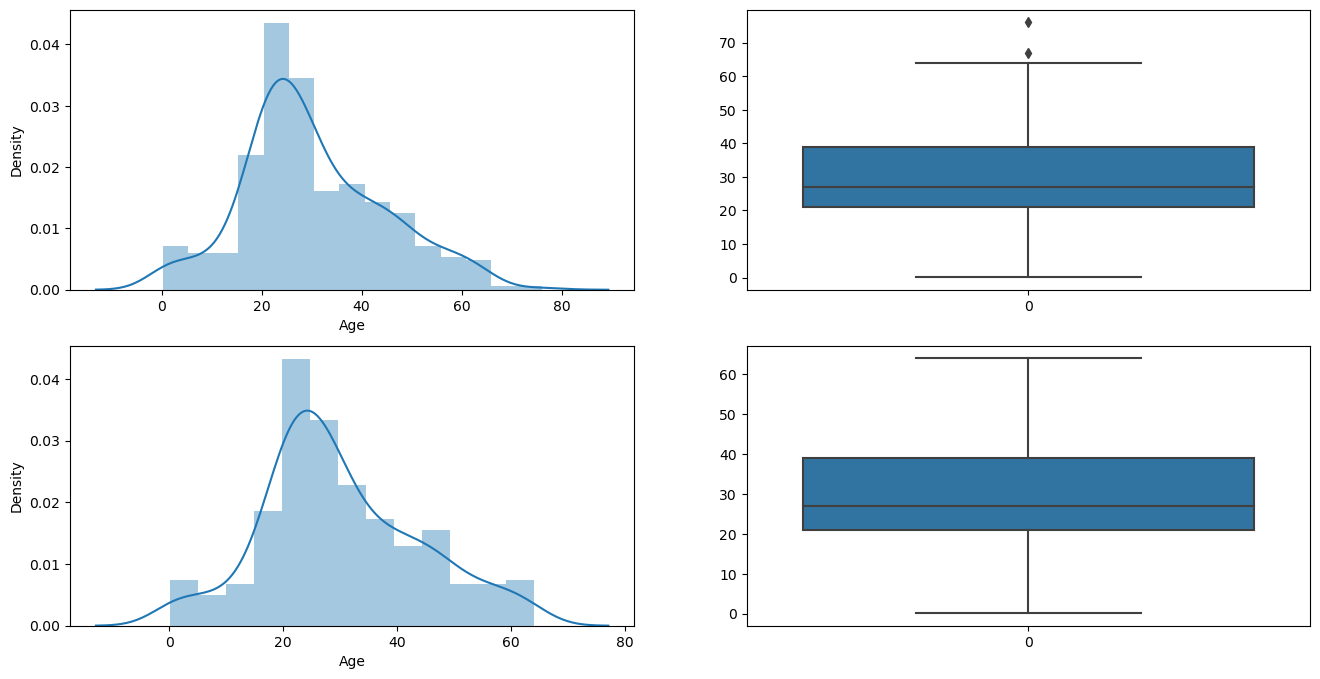

In [68]:
# Comparing 
plt.figure(figsize = (16,8)) 
plt.subplot(221)
sns.distplot(df['Age'])

plt.subplot(222)
sns.boxplot(df['Age'])

plt.subplot(223) 
sns.distplot(newdf['Age'])

plt.subplot(224) 
sns.boxplot(newdf['Age'])
plt.show()

In [69]:
#Capping

new_df_cap = df.copy()

new_df_cap['Age'] = np.where(
    new_df_cap['Age'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Age'] < lower_limit,
        lower_limit,
        new_df_cap['Age']
    )
)

In [70]:
new_df_cap.shape

(418, 12)

C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\2665230895.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\jyoti\AppData\Local\Temp\ipykernel_22440\2665230895.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['Age'])


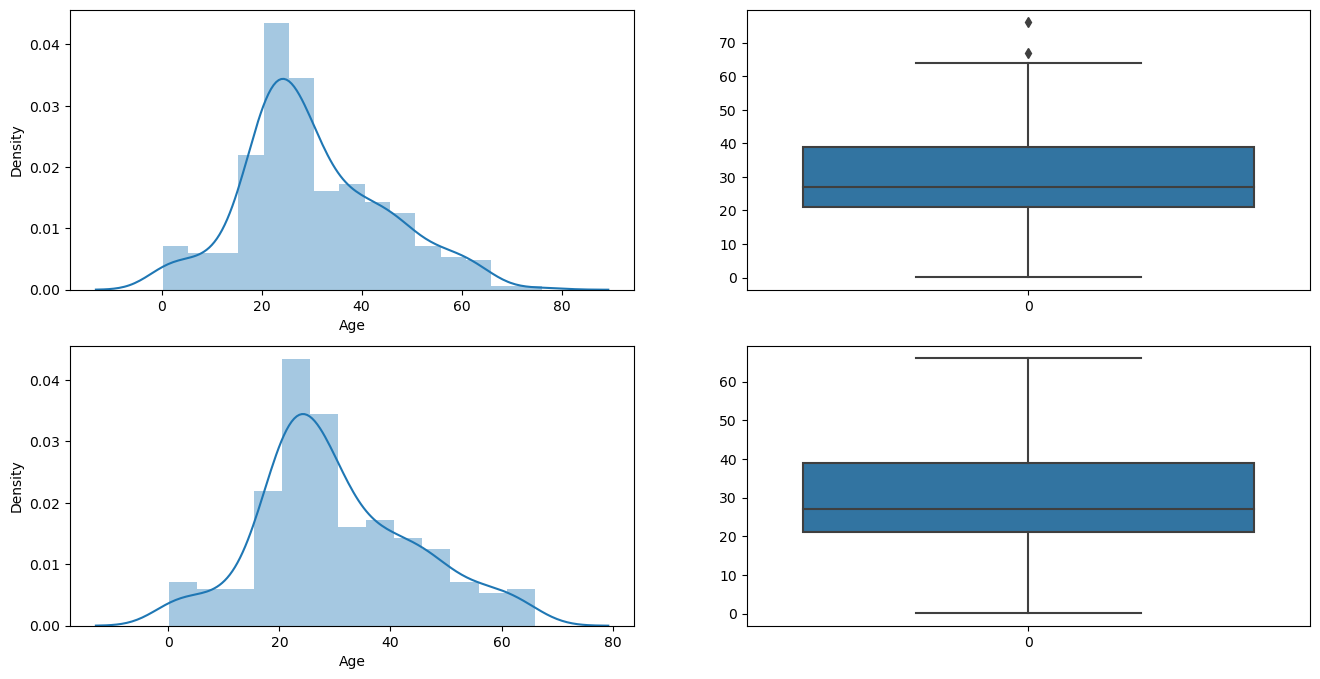

In [71]:
# Comparing 
plt.figure(figsize = (16,8)) 
plt.subplot(221) 
sns.distplot(df['Age']) 

plt.subplot(222) 
sns.boxplot(df['Age'])

plt.subplot(223) 
sns.distplot(new_df_cap['Age'])

plt.subplot(224) 
sns.boxplot(new_df_cap['Age'])

plt.show() 